# Machine Learning: Titanic Dataset Analysis
---
## Exploring the Titanic Dataset 
## Jose Luis Rodriguez
---
### Notebook Setup

Packages used in this analysis:

- **Pandas:** An open source library providing high-performance, easy-to-use data structures and data analysis tools
- **Matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments
- **Seaborn:** A Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics
- **Sckitlearn:** Machine Learning in Python. Simple and efficient tools for data mining and data analysis

In [1]:
# Load packages
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score,train_test_split

Python version and system information 

In [2]:
# System Information
version,distribution, date = sys.version.split("|")
date, os = date.split("\n")

print("Python Version: "+ version +"\n"+ 
      "Distribution: "+ distribution +"\n"+
      "Date: "+ date +"\n"+
      "Operation System: " + os)


Python Version: 3.6.1 
Distribution: Anaconda custom (x86_64)
Date:  (default, May 11 2017, 13:04:09) 
Operation System: [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


## Overview
The challenge is to develop an algorithm using the Titanic dataset to make a prediction about passenger survival. The data set consist of a number of variables (features) describing each passenger (gender, age, ticket class, fare, others). There are two data sets the training set which contains a Survival variable and the test set to determine the accuracy of the predictive model on unseen data. The model, charts and analysis on this report was generated using python (Version 3.6.1) and the following packages:

### Data Description - Table 1: Titanic Data Set - Data Dictionary

|Variable|Definition|Key|
|-------|-----------|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex| male or female|
|Age|Age in years|numeric|
|sibsp|# of siblings / spouses aboard the Titanic|numeric|
|parch|# of parents / children aboard the Titanic|numeric|
|ticket|Ticket number|character|
|fare|Passenger fare|numeric|
|cabin|Cabin number|character|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

#### Variable Notes

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way.
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


## Data Exploration and Visual Analysis
As part of the data preparation process its necessary to check the shape of both data sets (train, test), to determine the number of observation and columns (instances and features) that are present in each data set. Its also good to check the ﬁrst and last couple of rows of the data set to have an idea of how the data looks like.

In [37]:
## load the data
test = pd.read_csv("../data/test.csv")
train = pd.read_csv("../data/train.csv")
#class_labels = pd.read_csv("../data/gender_submission.csv")

# Checking the data dimension number of observations and features
test_sphape = test.shape
train_shape = train.shape

print("Train Data (Rows, Columns): " + str(train_shape))
print("Testing Data (Rows, Columns): "+ str(test_sphape))


Train Data (Rows, Columns): (891, 12)
Testing Data (Rows, Columns): (418, 11)


### Table 2: Training Data Set Inspection - Shape (Rows, Columns): (891, 12)

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


By determine the shape of the data we can get an idea of the number of observations and features present in the data. Then by inspecting the ﬁrst couple of rows (Table.2) of the training data set preliminary observations of the data can be make this step is important as it will give us an idea of how the data looks like also it helps to determine if there are any issues with the data header (column names) and perform some preliminary data integrity. Moreover we can see that the the training set contains the variable that we are trying to predict (Survived).

### Table 3: Testing Data Set Inspection - Shape (Rows, Columns): (418, 11)

In [5]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
deck = [ cabin.split(" ")[0][0] for cabin in train["Cabin"][train["Cabin"].notnull()]]
train.loc[0:,"Cabin"][train.loc[0:,"Cabin"].notnull()] = deck

During the data exploration process we can start thinking in what variables may be useful to predict passenger survival, such as the variable Name and Ticket. Also on this step we can start thinking in how to process to deal with missing values (NaN) as well as how to interpret values in the Age column as some of the are given as double instead of integers (whole numbers) which is how age is usually report. Finally from the testing table above (Table.3) we can see that the Survived column (variable) is not present as this is the data set that we are going to use to test the accuracy of the model.

## Data Visualization
When exploring a data set often its useful to try to visualize the variables and possible relationships between variables in the data. For this purpose we can use simple plots such as barplots, histograms and scatter plots if possible to help us identify some patterns in the data in a more visual way. These observation will be helpful later when we are determine what variables would be more helpful when trying to predict passenger survival.

### Figure 1: Barplots of Passenger Count by Gender

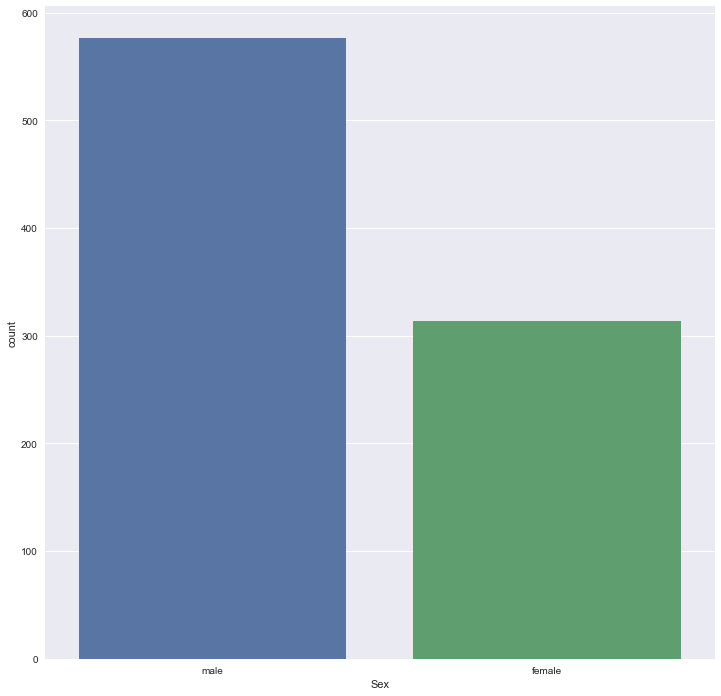

In [7]:
plt.subplots(figsize=(12,12))
sns.countplot(train['Sex'])
plt.show()

From the passenger count by gender plot (Figure.1) we can see how there are almost twice the number of men than women. There may be a number of explanations for why there are more men in the ship such as most crew members on the Titanic were men or in that time it was most likely for a men to travel alone than a women.

### Figure 2: Barplots of Passenger Count by PClass

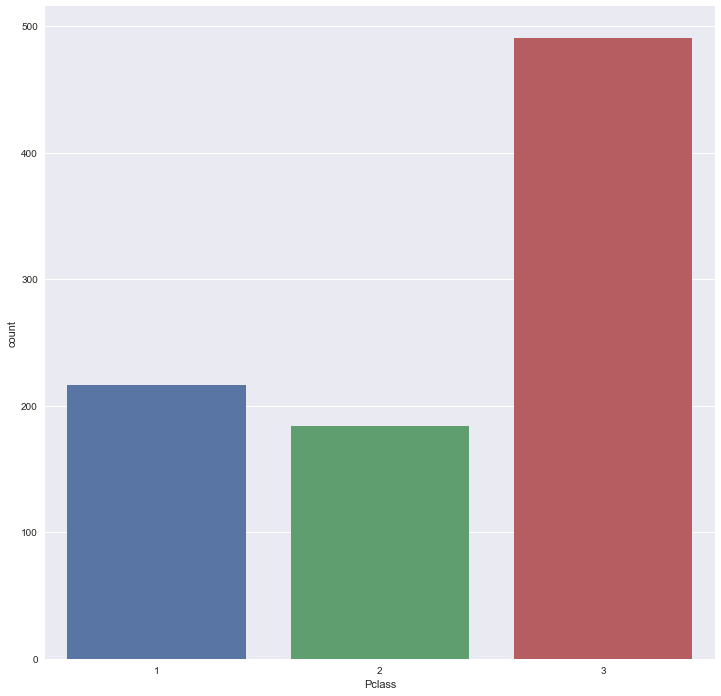

In [8]:
plt.subplots(figsize=(12,12))
sns.countplot(train['Pclass'])
plt.show()

Now from the passenger count by Pclass (Figure.2) we can determine that most of the passengers in the training data were in PClass number 3 or lower class again we can speculate that this is due to the number of crew members and people migrating to The United States.

### Figure 3: Barplots of Passenger Count by Cabin

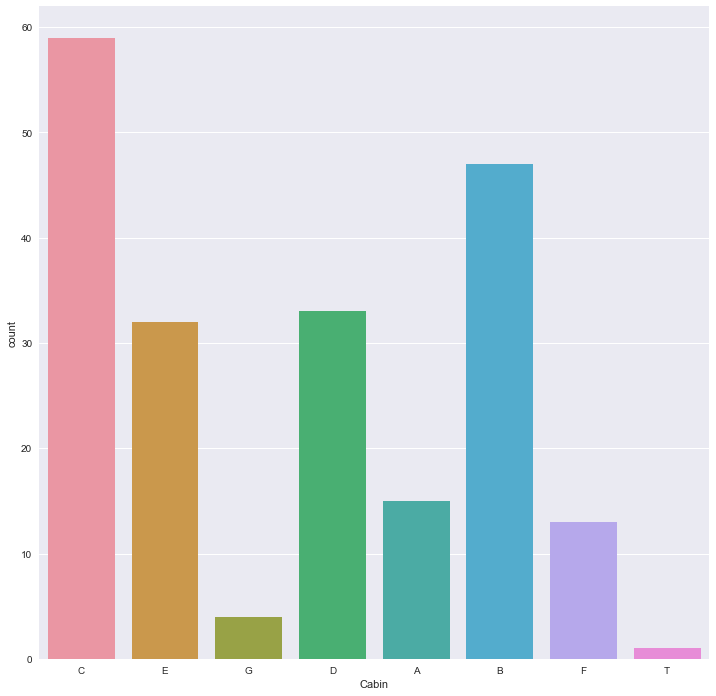

In [9]:
plt.subplots(figsize=(12,12))
sns.countplot(train['Cabin'])
plt.show()

By looking at the passenger count by Cabin (Figure.3) pair with the Titanic deck layout we can have an idea of passengers proximity to the upper level.

### Figure 4: Barplots of Passenger Count by Port of Embarked

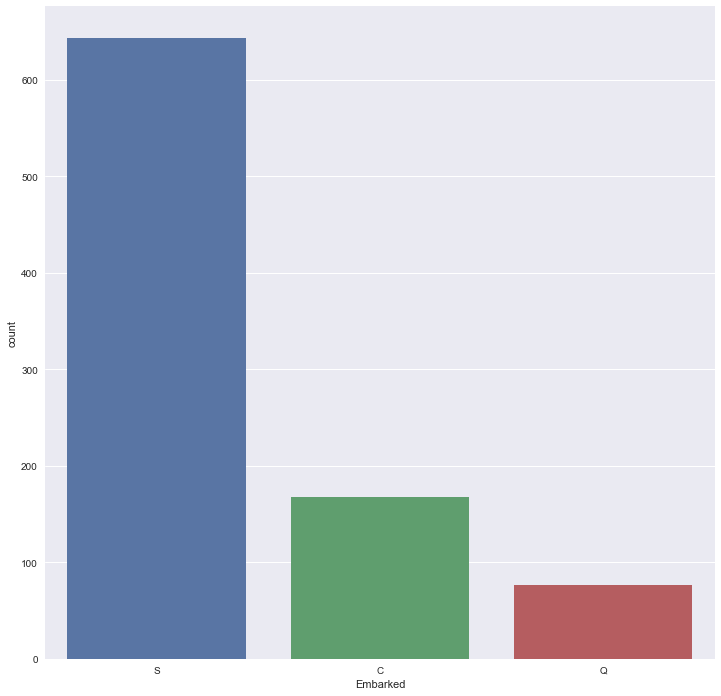

In [10]:
plt.subplots(figsize=(12,12))
sns.countplot(train['Embarked'])
plt.show()

Figure.4 is showing the count by port of embarked, we can determine that Southampton port (S) is where most passengers boarded the Titanic.

## Variable Interaction
The previous plots gives us an idea of variables (Gender, Pclass, Cabin and Embarked) distribution and behavior. Now we can take that same approach one step further to examine how the diﬀerent independent variables (features – Pclass, Sex, Age, SibSp, Parch, Fare, Cabin and Embarked) interact with the dependent variable (target – Survived). 

### Figure 5: Variable Interaction - Survived by Fare

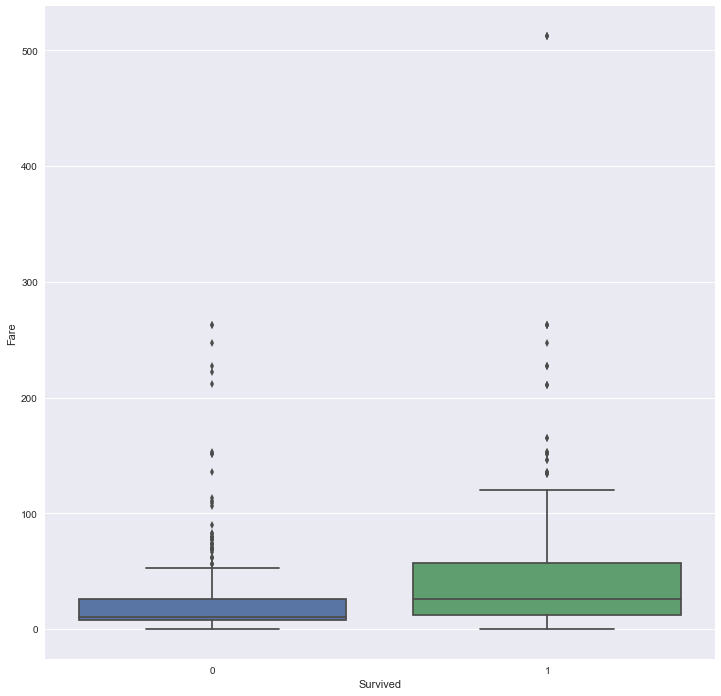

In [11]:
plt.subplots(figsize=(12,12))
sns.boxplot(train['Survived'],train['Fare'])
plt.show()

In ﬁgure.5 the interaction between Survived and Fare where we can see that as fare prices are higher survival rate increase.

### Figure 6: Variable Interaction - Survived by Age

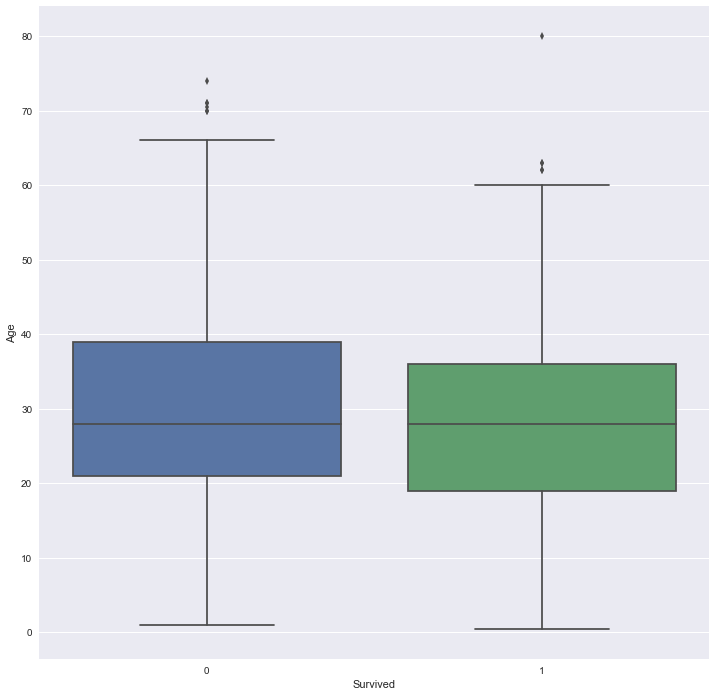

In [12]:
plt.subplots(figsize=(12,12))
sns.boxplot(train['Survived'],train['Age'])
plt.show()

In ﬁgure.6 the interaction between Survived and Age shows survival rate among younger passengers is greater.

### Figure 7: Variable Interaction - Survived by Gender

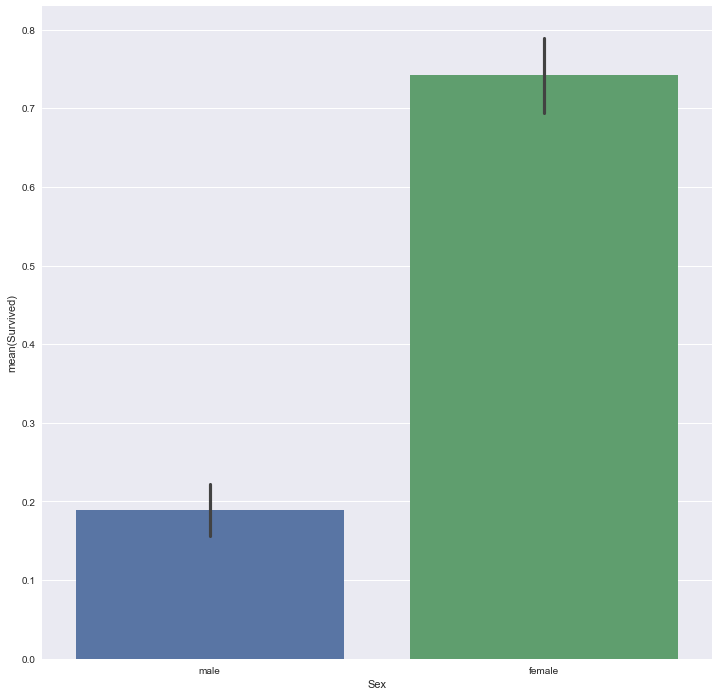

In [13]:
plt.subplots(figsize=(12,12))
sns.barplot(train['Sex'],train['Survived'])
plt.show()

By looking at the mean survival rate we can see some patterns such as in ﬁgure.7 mean(Survived) by Gender we can see that survival mean rate among female passenger is almost 3 times mens survival rate.

### Figure 8: Variable Interaction - Survived by Gender and PClass

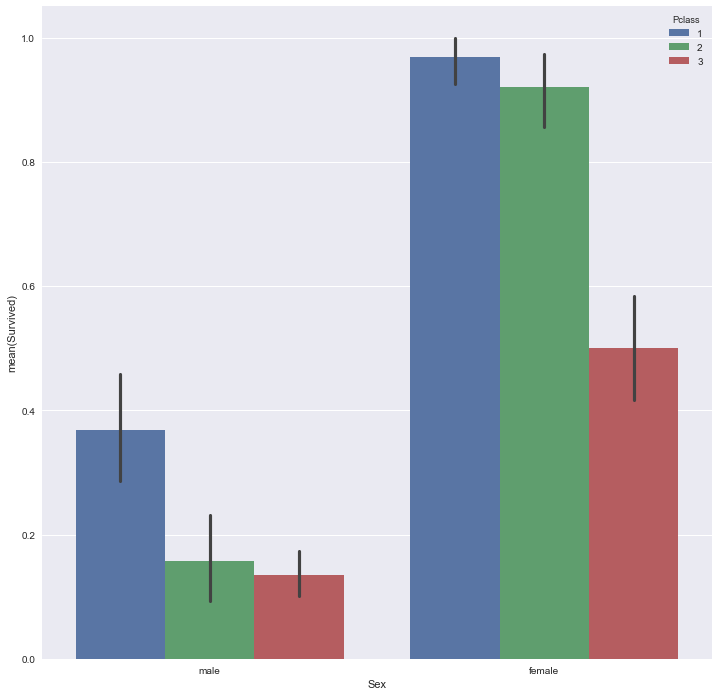

In [14]:
# Gender: male = 0, female = 1
# Class 
# 1 = high
# 2 = middle 
# 3 = lower
plt.subplots(figsize=(12,12))
sns.barplot(train['Sex'],train['Survived'],train['Pclass'])
plt.show()

Finally in ﬁgure.8 mean(Survived) by Gender and PClass shows the mean survival rate of passengers by gender and the three diﬀerent ticket classes (1=Upper Class, 2=Middle Class and 3=Lower Class) interesting

### Figure 9: Variable Interaction - Survived by Gender and Cabin

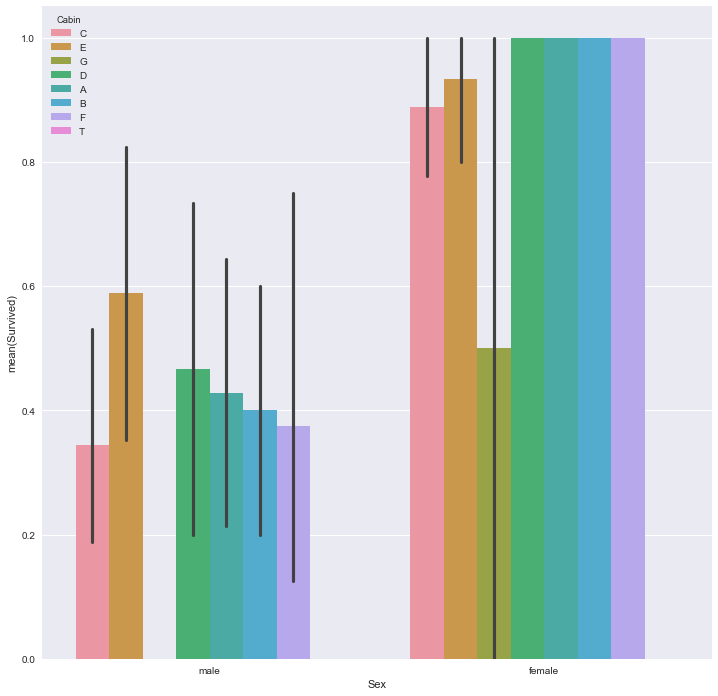

In [15]:
plt.subplots(figsize=(12,12))
sns.barplot(train['Sex'],train['Survived'],train['Cabin'])
plt.show()

## Data Preparation and Analysis
During the data preparation process it was necessary to transform some variables from character categorical variables to binary/numeric variables in order to make them part of the model. The Sex column (feature) was transform from character string male and female to 0, 1. The Embarked Column with entries (S,C,Q) was also transform to values 0,1,2 as well as the cabin column. These type of data transformations allows to perform a more in-depth data analysis and get some more insights about the data. Its important to note that some variables dont any any numeric meaning such as PassengerId that represent unique passengers ids.

In [16]:
train['Sex'] = list(train['Sex'].factorize()[0])
train['Embarked'] = list(train['Embarked'].factorize()[0])
train['Cabin'] = list(train['Cabin'].factorize()[0])
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Pclass'] = train['Pclass'].fillna(train['Pclass'].mean())
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,-1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,-1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,-1,0


### Table 4: Training Data Set - Summary Statistics

In [18]:
train[train.columns[1:]].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,-0.188552,0.359147
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,1.815143,0.638707
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,-1.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,-1.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,-1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,7.000000,2.000000


From the data description we can get some preliminary insights about the data. Its important to note the type of variable and its meaning in this case *PassengerId* doesnt mean much as this is a unique ID for each passager, But we can look at the other variables such as:

- **Survived:** That has two possible values 1 or 0, for its mean 0.38 we can infer that about 0.38 or 38% of the passenger survived. 
- **Pclass:** For the case of passenger class with three values 1 = high, 2 = middle and 3 = lower socioeconomic status we get some insights from the mean 2.3086 that there were more passengers from middle and lower socioeconomic status.
- **Sex:** After factorizing the variable sex we get a mean of 0.3524 which suggest that there were slightly more men passengers on board
- **Age:** From the count we can see that about 200 records are missing values for Age also we can infer from the mean 29.69 that the passengers were relatively young.
- **SibSp:** For thus variable (number of siblings/spouses) we can see that the max value in the data set is 8 min 0 now the mean is 0.5230 indicating us that most passengers travel alone or with one siblings/spouses.
- **Parch:** For the case of number of parents/children the max value is 6 min value is 0 with a mean of 0.3815 again indicating that most passengers travel alone. 
- **Fare:** This variable is interesting because the mean 32.2042 and 25%,50% and 75% percentiles seem to be normal and be reasonable spread out but the max value of 512.3292 is significally far from the mean, more in depth analysis is necessary for this variable.
- **Embarked:** It seems like most people embarked from port S given that the mean is closer to zero

## Correlation Analysis
After looking at the summary statistics and doing some general observation its time to do some more in depth analysis of the relationship between the dependent and independent variables. In this case the relationship between the variable Survived and the other vari-ables, by looking at the Pearson Correlation table showing the strength (positive, negative) of the relation between the variables in the data set. By looking at the ﬁrst column we can identify a couple of variable with signiﬁcantly correlated coeﬃcient such as (Sex, Pclass, Cabin and Fare), it may be hard to ﬁnd correlations in the table hence Figure.4 shows the table using a Heatmap allowing for a visual representation of the correlation table.

### Table 5: Titanic Train Data - Correlation Table

In [19]:
corr = train[train.columns[1:]].corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.270310,0.101849
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.562800,0.050992
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.114229,0.111249
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.167017,0.001932
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.054525,-0.058008
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.036944,-0.076625
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.376888,0.058462
Cabin,0.270310,-0.562800,0.114229,0.167017,-0.054525,0.036944,0.376888,1.000000,0.007110
Embarked,0.101849,0.050992,0.111249,0.001932,-0.058008,-0.076625,0.058462,0.007110,1.000000


As we are interested on the variables that interact with *Survived*, some of the values are highlighted as they shown some degree of interaction (positive,negative) with the target variable *Survived*. Its also important to note that some of the other variables can be correlated to each other so we have to be careful to not use two variable highly correlated to each other.

|**Variable**|**Correlation Coefficient**|
|------------|---------------------------|
|Survived|1.000000|
|Pclass|**-0.338481**|
|Sex|**0.543351**|
|Age|-0.069809|
|SibSp|-0.035322|
|Parch|0.081629|
|Fare|**0.257307**|
|Cabin|**0.270310**|
|Embarked|0.101849|

## Heatmap
Now another more visual way to look at correlation tables is by looking at a heatmap, allowing us to identify more easily variable interaction 

### Figure 10: Titanic Train Data - Correlation Heatmap

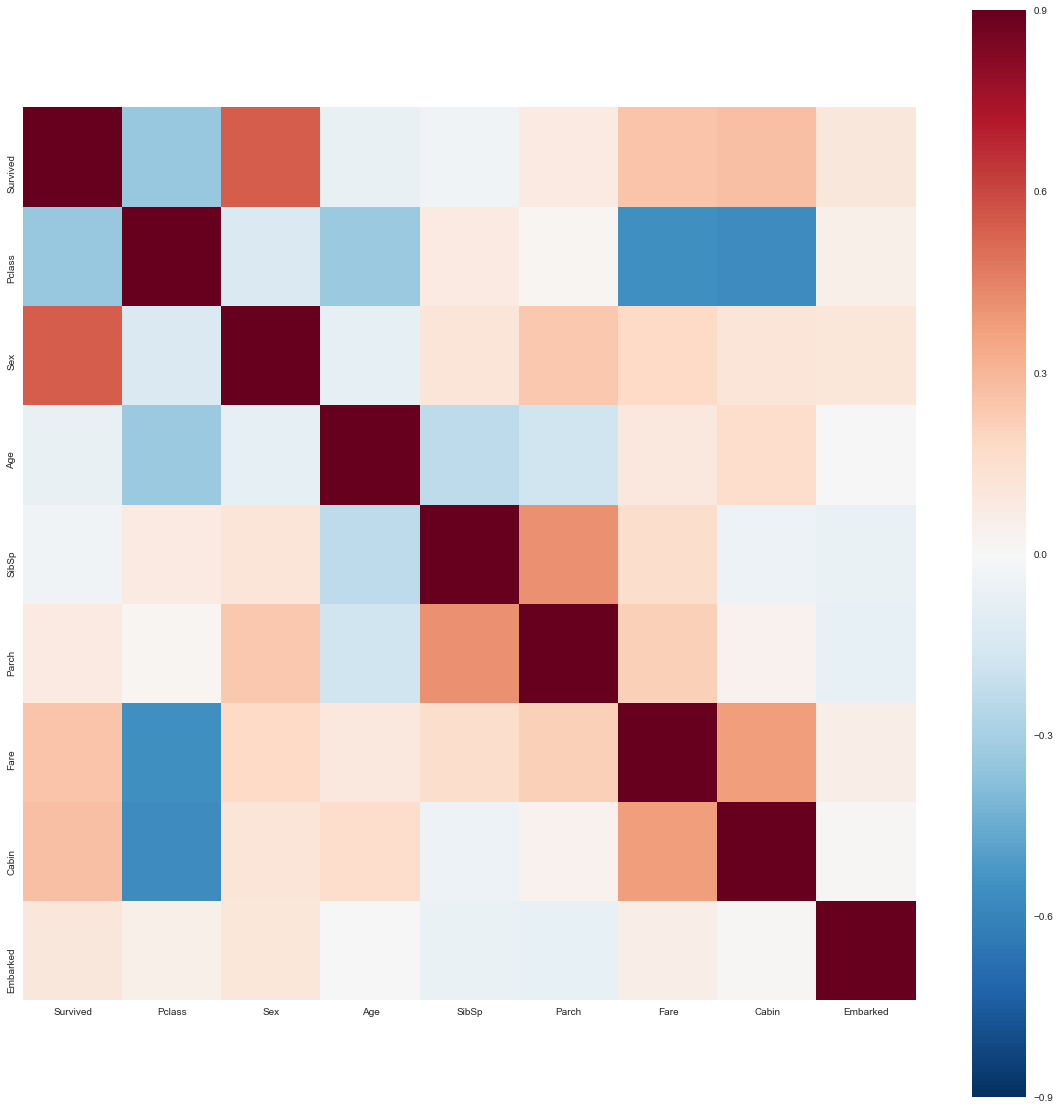

In [20]:
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, vmax=.9, square=True)
plt.show()

## Model Selection
Per the preliminary analysis (visual and descriptive) we have and idea of what columns (fea-tures) to use to create a model, now the challenge is to predict passenger survival identify in the training data set as Survived. This a discrete variable (yes/no). We can use regression analysis to be more precise logistic regression method to classify passenger survival given the diﬀerent features present in the training data set.

### Predictive Model: Logistic Regression
The ﬁrst step in creating the model would be to split the train data in two in order to test the accuracy of the model. The sklearn package has a model selection method that helps with this task by splitting arrays or matrices into random train and test subsets. We will use the $X\_test$ data which havent been seen (train) by the model and will use the $y\_test$ data to evaluate model accuracy.

In [21]:
features = ['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']
predictors = train[features]
train_target = train['Survived']
passengerId = train['PassengerId']
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(predictors, train_target, passengerId)

### Training the model

In [22]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluating the Model and Feature Selection 

After making the necessary changes on the testing data set we can use the score method part of the linear_regression function to evaluate how well the model predicts unseen data.

In [23]:
predict = model.predict(X_test)
coef = model.coef_[0]
intercept = model.intercept_[0]

### Creating the regression line equation

In [24]:
eq = "".join("("+str(coef[i])+"*"+k+")+" for i,k in enumerate(features))
eq = "Survived = " + str(intercept)+" + " + eq[:-1]
eq

'Survived = 1.47762872826 + (-0.797899772445*Pclass)+(2.54362918116*Sex)+(-0.0368925544312*Age)+(-0.322065515853*SibSp)+(-0.111462122365*Parch)+(0.00264488746187*Fare)+(0.124804758718*Cabin)+(0.194288109684*Embarked)'

After splitting the training data in two subsets, we can create the logistic regression model by ﬁtting the relevant features (independent variables) and to the target testing variable. The following formula is derive from the logistic regression model:

$$ \widehat{Survived} =1.42981371 − (0.8420 ∗ P class) + (2.6601 ∗ Sex) \\
− (0.0354 ∗ Age) − (0.2276 ∗ SibSp) − (0.1472 ∗ P arch) \\
+ (0.0033 ∗ F are) + (0.1704 ∗ Cabin) + (0.2498 ∗ Embarked)
$$


In [25]:
model.score(X_test,y_test)

0.820627802690583

The model has an accuracy of 0.8206 meaning that the model explains about 78% of the variation in the data when using most variables but (name and ticket). To improve the model in a future work feature selection could be use to identify the variables that have more inﬂuence over the survived variable.

### Cross Validation - Model

In [26]:
k_fold = KFold(n_splits=5)
score = cross_val_score(model, X_test, y_test, cv=k_fold, n_jobs=-1)
sum(score)/len(score)

0.80707070707070705

### Feature Selection

In [27]:
feature_selection = SelectFromModel(model, prefit=True)
select_predictors = feature_selection.transform(X_train)
print(X_train[features].columns[feature_selection.get_support()]) 

Index(['Pclass', 'Sex'], dtype='object')


### Train model - Feature Selection


In [28]:
selection_model = linear_model.LogisticRegression()
selection_model.fit(select_predictors, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
test_predictors = feature_selection.transform(X_test)
predited_target = selection_model.predict(test_predictors)

### Cross Validation - Feature Selection Model

In [30]:
k_fold = KFold(n_splits=5)
score = cross_val_score(selection_model, test_predictors, y_test, cv=k_fold, n_jobs=-1)
sum(score)/len(score)

0.80272727272727273

---------

**Kaggel Submission - Test Data** 

Keep in mind that we need to do the same data transformation from the Train data set to the Test data set in order to make the test data work with the model. We would have to factorize the variables *Sex (male = 0, female = 1), Embarked (S=0,C=1,Q=2), Cabin* as well as filling in NA's with the mean, where its necessary.

In [38]:
test['Sex'] = list(test['Sex'].factorize()[0])
test['Embarked'] = list(test['Embarked'].factorize()[0])
test['Cabin'] = list(test['Cabin'].factorize()[0])
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Pclass'] = test['Pclass'].fillna(test['Pclass'].mean())
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,-1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,-1,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,-1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,-1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,-1,1


In [39]:
test_features = test[features]
test_features = feature_selection.transform(test_features)
predited_test = selection_model.predict(test_features)

In [48]:
Submission = pd.DataFrame.from_dict({"PassengerId":list(test['PassengerId']),"Survived":predited_test})
Submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
